In [1]:
import pandas as pd

print("hello world")
print("hello world")

hello world
hello world


In [2]:
import numpy as np
#import matplotlib.pyplot as plt
from mlwpy import *
%matplotlib inline

In [3]:
np.random.randint(1, 7)

4

In [4]:
few_rolls = np.random.randint(1, 7, size=10)
many_rolls = np.random.randint(1, 7, size=1000)

<BarContainer object of 6 artists>

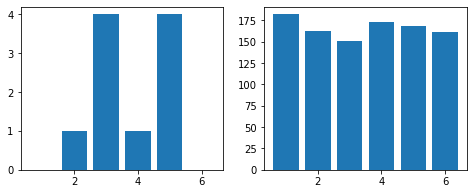

In [5]:
few_counts = np.histogram(few_rolls, bins=np.arange(.5, 7.5))[0]
many_counts = np.histogram(many_rolls, bins=np.arange(.5, 7.5))[0]

fig,(ax1, ax2)= plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
ax1.bar(np.arange(1, 7), few_counts)
ax2.bar(np.arange(1, 7), many_counts)


(0.0, 55.0)

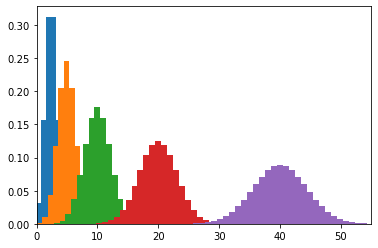

In [6]:
import scipy.stats as ss

b = ss.distributions.binom
for flips in [5, 10, 20, 40, 80]:
    # 동전을 수없이 던지면 확률 .5를 가지는 이항분포를 그린다.
    success = np.arange(flips)
    our_distribution = b.pmf(success, flips, .5)
    plt.hist(success, flips, weights=our_distribution)
plt.xlim(0,55)




(0.0, 55.0)

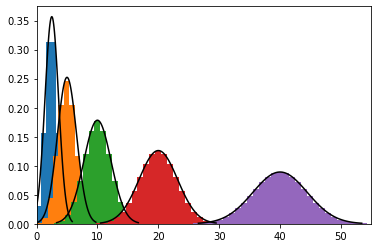

In [7]:
b=ss.distributions.binom
n=ss.distributions.norm

for flips in [5, 10, 20, 40, 80]:
    #동전 던지기
    success = np.arange(flips)
    our_distribution = b.pmf(success, flips, .5)
    #b.pmf : probability mass function
    plt.hist(success, flips, weights=our_distribution)

    # 이항 분포를 정규 분포로 근사합니다.
    # 평균과 표준편차를 설정합니다.
    mu = flips*.5,
    std_dev=np.sqrt(flips * .5 * (1-.5))

    # 정규분포를 위해 x와 y 포인트를 설정해야 합니다.
    # 함수에 xs를 입력하고 이를 통해 ys를 얻습니다.
    norm_x = np.linspace(mu-3*std_dev, mu+3*std_dev, 100)
    norm_y = n.pdf(norm_x, mu, std_dev)
    # n.pdf : probability density function
    plt.plot(norm_x, norm_y, 'k');

plt.xlim(0,55)

In [8]:
(2 * 12.50) + (12 * .5) + (3 * 1.75)


36.25

In [9]:
2+12+3

17

In [10]:
# 기본 파이썬 코드입니다.
quantity = [2, 12, 3]
costs = [12.5, .5, 1.75]
partial_cost = []
for q,c in zip(quantity,costs):
    partial_cost.append(q*c)
sum(partial_cost)


36.25

In [11]:
# 요즘 트렌드를 반영한 순수한 파이썬 코드입니다.
quantity = np.array([2, 12, 3])
costs = np.array([12.5, .5, 1.75])
np.sum(quantity*costs) # 요소별 곱



36.25

In [12]:
print(quantity.dot(costs),
      np.dot(quantity, costs),
      quantity @ costs,
      sep='\n')

36.25
36.25
36.25


In [13]:
for q_i, c_i in zip(quantity,costs):
    print("{:2d} {:5.2f} --> {:5.2f}".format(q_i, c_i, q_i*c_i))
print("Total:",
      sum(q*c for q,c in zip(quantity,costs)))

 2 12.50 --> 25.00
12  0.50 -->  6.00
 3  1.75 -->  5.25
Total: 36.25


In [14]:
values = np.array([10.0, 20.0, 30.0])
weights = np.full_like(values, 1/3)
# np.full_like(첫번째 들어갈 배열과 같은형태로 만듬 , 채워넣을수 )
# 따라서 1/3을 반복함 (1/3, 1/3, 1/3)

print("weight:", weights)
print('via mean:', np.mean(values))
print('via weight and dot:', np.dot(weights,values))


weight: [0.3333 0.3333 0.3333]
via mean: 20.0
via weight and dot: 20.0


In [15]:
values = np.array([10.0, 20.0, 30.0])
weights = np.array([.5, .25, .25])

np.dot(values, weights)



17.5

In [16]:
# 홀, 짝
payoffs = np.array([1.0, -.5])
probs   = np.array([ .5,  .5])
np.dot(payoffs,probs)

0.25

In [17]:
def is_even(n):
    # 2로 나눈 나머지가 0이면 짝수입니다.
    return n % 2 == 0
winnings = 0.0
for toss_ct in range(10000):
    die_toss = np.random.randint(1,7)
    winnings += 1.0 if is_even(die_toss) else -0.5
print(winnings)

2542.0


In [18]:
values = np.array([5, -3, 2, 1])
squares = values * values
print(squares,
      np.sum(squares),
      np.dot(values,values), sep='\n')

[25  9  4  1]
39
39


In [19]:
errors = np.array([5, -5, 3.2, -1.1])
display(pd.DataFrame({'errors':errors,
                      'squared':errors*errors}))

,errors,squared
0,5.0000,25.0000
1,-5.0000,25.0000
2,3.2000,10.2400
3,-1.1000,1.2100


In [20]:
np.dot(errors, errors)

61.45

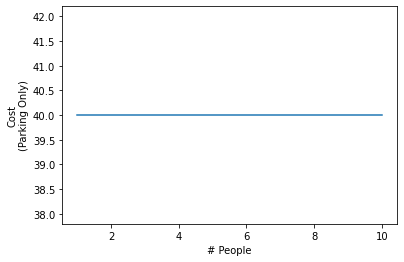

In [21]:
people = np.arange(1,11)
total_cost = np.ones_like(people) * 40
# np.full_like 와 달리 np.one_like 는 주어진 배열에 1로 채운것.

ax = plt.gca()

ax.plot(people, total_cost)
ax.set_xlabel("# People")
ax.set_ylabel('Cost\n(Parking Only)');


In [22]:
people = np.arange(1,11)
total_cost = 80.0 * people + 40.0


In [23]:
# .T(transpose)로 테이블을 가로로 돌려 출력합니다.
display(pd.DataFrame({'total_cost':total_cost.astype(np.int)},
                     index=people).T)
# total_cost.astype() 문자열을 숫자형으로 바꾸기

C:\Users\User\anaconda3\envs\book_base\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


,1,2,3,4,5,6,7,8,9,10
total_cost,120,200,280,360,440,520,600,680,760,840


Text(0.5, 0, 'People')

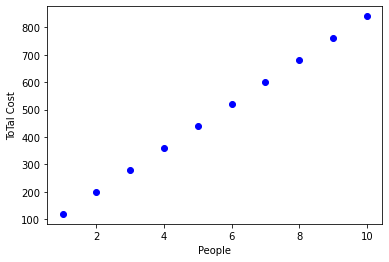

In [24]:
ax = plt.gca()
ax.plot(people, total_cost, 'bo')
ax.set_ylabel("ToTal Cost")
ax.set_xlabel("People")

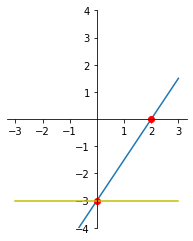

In [25]:
# -3부터 3까지 범위 내에 포인트 100개를 만듭니다.
xs = np.linspace(-3,3,100)

# 기울기(m)와 y절편(b)
m, b = 1.5, -3

ax = plt.gca()

ys = m*xs + b
ax.plot(xs, ys)

ax.set_ylim(-4,4)
high_school_style(ax) # mlwpy.py의 헬퍼 함수

ax.plot(0, -3, 'ro') # y절편
ax.plot(2, 0, 'ro') #오른쪽으로 두 칸 위쪽으로 세 칸 이동합니다.

# y = mx + b  에서 m = 0이면 y = b
ys = 0*xs + b
ax.plot(xs, ys, 'y');


In [26]:
# np.c_[]로 열별 배열을 만들 수 있습니다.
xs    = np.linspace(-3,3,100)
xs_p1 = np.c_[xs,np.ones_like(xs)]

# np.c[,] : 두 개의 1차원 배열을 칼럼을 세로로 붙여서 2차원 배열 만들기
# https://rfriend.tistory.com/352

display(pd.DataFrame(xs_p1).head())



,0,1
0,-3.0000,1.0000
1,-2.9394,1.0000
2,-2.8788,1.0000
3,-2.8182,1.0000
4,-2.7576,1.0000


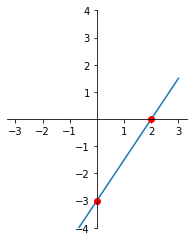

In [27]:
w    = np.array([1.5, -3])
ys   = np.dot(xs_p1,w)

ax = plt.gca()
ax.plot(xs,ys)
# 이 방법은 행렬의 곱으로 만든 다른 방식!
# 스타일링
ax.set_ylim(-4, 4)
high_school_style(ax)

ax.plot(0, -3, 'ro')
ax.plot(2, 0, 'ro')


In [28]:
number_people = np.arange(1, 11) # 사람 수 1-10
number_rbs = np.arange(0, 20) # 루트 비어 수 0-19

# Numpy 도구를 이용해서 두 배열의 외적을 구합니다.
# 실행해 보세요 : np.meshgrid([0, 1], [10, 20])
# 변수가 여러 개인 함수에 사용하기 좋습니다.
number_people, number_rbs = np.meshgrid(number_people, number_rbs)

total_cost = number_people * 80 + 10 * number_rbs + 40

In [29]:
# 'projection' : '3d'를 위해 라이브러리를 임포트해야 합니다.
import mpl_toolkits.mplot3d.axes3d

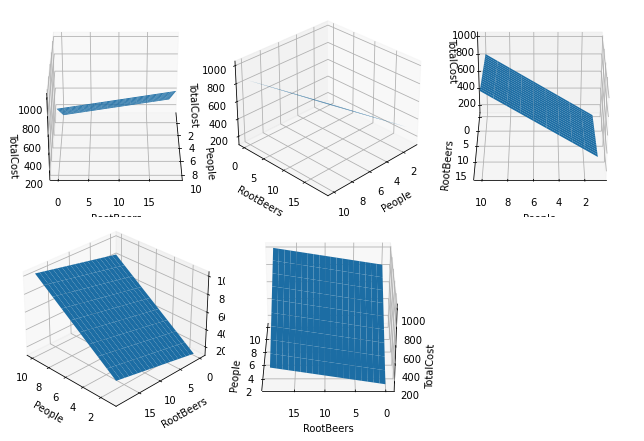

In [30]:
fig, axes = plt. subplots(2, 3, subplot_kw={'projection':'3d'},
                         figsize=(9,6),
                         tight_layout=True)

angles = [0, 45, 90, 135, 180]
for ax,angle in zip(axes.flat, angles):
    ax.plot_surface(number_people, number_rbs, total_cost)
    ax.set_xlabel("People")
    ax.set_ylabel("RootBeers")
    ax.set_zlabel("TotalCost")
    ax.azim = angle

# 마지막 축은 사용하지 않습니다.
axes.flat[-1].axis('off')
# 뭘 의미하는지 모르겠음 ,, 마지막 축이란게 뭐지???
fig.tight_layout()

In [31]:
number_people = np.array([2, 3])
number_rbs = np.array([0, 1, 2])
number_hotdogs = np.array([2, 4])

costs = np.array([80, 10, 5])

columns = ['People', 'Rootbeer', 'Hotdogs', 'TotalCost']

In [32]:
counts = np_cartesian_product(number_people,
                              number_rbs,
                              number_hotdogs)

totals = (costs[0] * counts[:,0] +
          costs[1] * counts[:,1] +
          costs[2] * counts[:,2] + 40)

display(pd.DataFrame(np.c_[counts, totals],
                     columns= columns).head(8))

,People,Rootbeer,Hotdogs,TotalCost
0,2,0,2,210
1,2,0,4,220
2,3,0,2,290
3,3,0,4,300
4,2,1,2,220
5,2,1,4,230
6,3,1,2,300
7,3,1,4,310


In [33]:
costs = np.array([80, 10, 5])
counts = np_cartesian_product(number_people,
                              number_rbs,
                              number_hotdogs)

totals = np.dot(counts,costs) + 40
display(pd.DataFrame(np.c_[counts, totals],
                     columns= columns).head(8))

,People,Rootbeer,Hotdogs,TotalCost
0,2,0,2,210
1,2,0,4,220
2,3,0,2,290
3,3,0,4,300
4,2,1,2,220
5,2,1,4,230
6,3,1,2,300
7,3,1,4,310


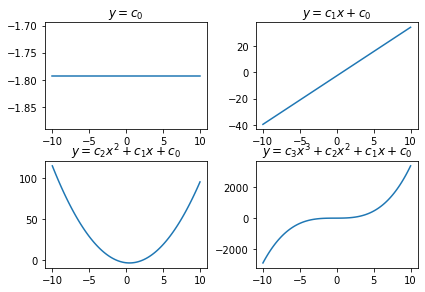

In [34]:
fig, axes = plt.subplots(2, 2)
fig.tight_layout()

titles = ["$y=c_0$",
          "$y=c_1x+c_0$",
          "$y=c_2x^2+c_1x+c_0$",
          "$y=c_3x^3+c_2x^2+c_1x+c_0$"]

xs = np.linspace(-10,10,100)
for power, (ax,title) in enumerate(zip(axes.flat, titles), 1):
    coeffs = np.random.uniform(-5, 5, power)
    poly = np.poly1d(coeffs)
    ax.plot(xs, poly(xs))
    ax.set_title(title)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


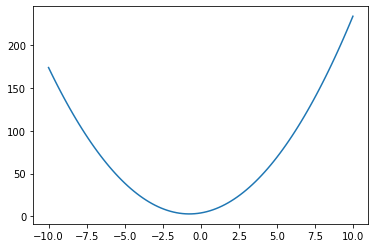

In [35]:
plt.Figure((2, 1.5))

xs = np.linspace(-10, 10, 101)
coeffs = np.array([2,3,4])
ys = np.dot(coeffs,[xs**2, xs, 1])

# 점곱으로 멋진 포물서늘 그릴 수 있습니다.
plt.plot(xs,ys)

In [36]:
oned_vec = np.arange(5)
print(oned_vec, "-->", oned_vec * oned_vec )
print("self dot:", np.dot(oned_vec,oned_vec) )


[0 1 2 3 4] --> [ 0  1  4  9 16]
self dot: 30


In [37]:
row_vec = np.arange(5).reshape(1,5)
col_vec = np.arange(0, 50, 10).reshape(5,1)
# 아마 np.arange().reshape() 에 reshpae는
# 행렬의 크기를 다시금 만들어주는? 그런 기능 같음.

In [38]:
print("row_vec:", row_vec,
      "col_vec:", col_vec,
      "dot:", np.dot(row_vec, col_vec), sep= '\n')

row_vec:
[[0 1 2 3 4]]
col_vec:
[[ 0]
 [10]
 [20]
 [30]
 [40]]
dot:
[[300]]


In [39]:
out = np.dot(col_vec,row_vec)
print(out)

[[  0   0   0   0   0]
 [  0  10  20  30  40]
 [  0  20  40  60  80]
 [  0  30  60  90 120]
 [  0  40  80 120 160]]


In [40]:
out = np.dot(row_vec,col_vec)
print(out)

[[300]]


In [41]:
col_vec = np.arange(0, 50, 10).reshape(5, 1)
row_vec = np.arange(0,5).reshape((1, 5))
oned_vec = np.arange(5)

daaat = np.dot(oned_vec, col_vec)
print(daaat)

[300]


In [42]:
try:
    np.dot(col_vec, oned_vec) # *쾅!*
except ValueError as e:
    print("I went boom:", e)

I went boom: shapes (5,1) and (5,) not aligned: 1 (dim 1) != 5 (dim 0)


In [43]:
print(oned_vec.shape,
      col_vec.shape, sep='\n')


(5,)
(5, 1)


In [44]:
print(np.dot(row_vec,col_vec))
try: print(np.dot(col_vec,row_vec))
except: print('boom')

[[300]]
[[  0   0   0   0   0]
 [  0  10  20  30  40]
 [  0  20  40  60  80]
 [  0  30  60  90 120]
 [  0  40  80 120 160]]


In [45]:
D = np.array([[1,3],
              [2,5],
              [2,7],
              [3,2]])
w = np.array([1.5, 2.5])

In [46]:
np.dot(D,w)

array([ 9. , 15.5, 20.5,  9.5])

In [47]:
try:
    np.dot(w,D)
except ValueError:
    print("Boom. : sadFace:")

Boom. : sadFace:


In [48]:
def rdot(arr,brr):
    '인수를 반대(reverse)로 넣는 np.dot'
    return np.dot(brr,arr)
rdot(w, D)

array([ 9. , 15.5, 20.5,  9.5])

In [49]:
1.1 + 2.2 == 3.3


False

In [50]:
type(1.1), type(2.1), type(1.1+2.1), type(3.3)


(float, float, float, float)

In [51]:
np.allclose(1.1+2.2, 3.3)
# np. allclose 는 두 요소를 비교할때 사용한다. 즉,
# 설정된 오차범위보다 안에 있어면 True를 아니면 False를 반환함.



True